# Topic 2: Simple Text Classification - SOLUTIONS

Complete solutions for text classification exercises.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Solution 1: Extended Dataset Creation

In [10]:
def create_extended_dataset():
    """Create a larger German sentiment dataset."""
    
    # Positive examples
    positive_texts = [
        "Das ist super gut", "Ich bin sehr glücklich", "Fantastisch",
        "Wunderbar gemacht", "Ausgezeichnete Qualität", "Perfekt",
        "Sehr zufrieden", "Toll", "Großartig", "Hervorragend",
        "Ich liebe es", "Absolut empfehlenswert", "Beeindruckend",
        "Erstklassig", "Brilliant", "Wundervoll", "Exzellent",
        "Das gefällt mir sehr", "Richtig gut", "Phänomenal"
    ]
    
    # Negative examples
    negative_texts = [
        "Das ist schlecht", "Ich bin traurig", "Furchtbar",
        "Schlecht gemacht", "Schlechte Qualität", "Schrecklich",
        "Sehr unzufrieden", "Schlimm", "Katastrophal", "Entsetzlich",
        "Ich hasse es", "Nicht empfehlenswert", "Enttäuschend",
        "Minderwertig", "Grauenhaft", "Abscheulich", "Mangelhaft",
        "Das gefällt mir nicht", "Richtig schlecht", "Unerträglich"
    ]
    
    # Neutral examples
    neutral_texts = [
        "Das ist okay", "Geht so", "Durchschnittlich",
        "Nicht besonders", "Mittelmäßig", "So lala",
        "Ganz normal", "Akzeptabel", "In Ordnung", "Standard",
        "Nichts Besonderes", "Gewöhnlich", "Alltäglich",
        "Passabel", "Annehmbar", "Mäßig", "Regulär",
        "Kann man machen", "Ist halt so", "Erwartungsgemäß"
    ]
    
    # Combine all data
    texts = positive_texts + negative_texts + neutral_texts
    labels = (['positive'] * len(positive_texts) + 
             ['negative'] * len(negative_texts) + 
             ['neutral'] * len(neutral_texts))
    
    return pd.DataFrame({'text': texts, 'label': labels})

# Create dataset
df = create_extended_dataset()
print(f"Dataset created with {len(df)} samples")
print("\nClass distribution:")
print(df['label'].value_counts())
print("\nSample data:")
print(df.head(10))

Dataset created with 60 samples

Class distribution:
label
positive    20
negative    20
neutral     20
Name: count, dtype: int64

Sample data:
                      text     label
0        Das ist super gut  positive
1   Ich bin sehr glücklich  positive
2              Fantastisch  positive
3        Wunderbar gemacht  positive
4  Ausgezeichnete Qualität  positive
5                  Perfekt  positive
6           Sehr zufrieden  positive
7                     Toll  positive
8                Großartig  positive
9             Hervorragend  positive


## Solution 2: Multiple Algorithm Comparison

In [11]:
def compare_algorithms(X_train, X_test, y_train, y_test):
    """Compare multiple classification algorithms."""
    
    algorithms = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM': SVC(kernel='linear', random_state=42)
    }
    
    results = {}
    
    for name, algorithm in algorithms.items():
        # Train the algorithm
        algorithm.fit(X_train, y_train)
        
        # Make predictions
        y_pred = algorithm.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(algorithm, X_train, y_train, cv=5)
        
        results[name] = {
            'model': algorithm,
            'accuracy': accuracy,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_pred
        }
        
        print(f"{name}:")
        print(f"  Accuracy: {accuracy:.3f}")
        print(f"  CV Score: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
        print()
    
    return results

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

# Vectorize text
vectorizer = CountVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Compare algorithms
algorithm_results = compare_algorithms(X_train_vec, X_test_vec, y_train, y_test)

Naive Bayes:
  Accuracy: 0.333
  CV Score: 0.453 (±0.084)

Logistic Regression:
  Accuracy: 0.333
  CV Score: 0.428 (±0.085)

SVM:
  Accuracy: 0.389
  CV Score: 0.428 (±0.085)



## Solution 3: Feature Extraction Comparison

In [12]:
def compare_feature_extraction():
    """Compare different feature extraction methods."""
    
    vectorizers = {
        'Count Vectorizer': CountVectorizer(max_features=1000),
        'TF-IDF': TfidfVectorizer(max_features=1000),
        'TF-IDF + Bigrams': TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
    }
    
    results = {}
    
    for vec_name, vectorizer in vectorizers.items():
        # Transform data
        X_train_transformed = vectorizer.fit_transform(X_train)
        X_test_transformed = vectorizer.transform(X_test)
        
        # Train simple classifier
        classifier = MultinomialNB()
        classifier.fit(X_train_transformed, y_train)
        
        # Evaluate
        accuracy = classifier.score(X_test_transformed, y_test)
        cv_scores = cross_val_score(classifier, X_train_transformed, y_train, cv=5)
        
        results[vec_name] = {
            'accuracy': accuracy,
            'cv_mean': cv_scores.mean(),
            'feature_count': X_train_transformed.shape[1]
        }
    
    return results

# Compare feature extraction methods
feature_results = compare_feature_extraction()

print("Feature Extraction Comparison:")
for method, metrics in feature_results.items():
    print(f"{method}:")
    print(f"  Accuracy: {metrics['accuracy']:.3f}")
    print(f"  CV Score: {metrics['cv_mean']:.3f}")
    print(f"  Features: {metrics['feature_count']}")
    print()

Feature Extraction Comparison:
Count Vectorizer:
  Accuracy: 0.333
  CV Score: 0.453
  Features: 54

TF-IDF:
  Accuracy: 0.333
  CV Score: 0.378
  Features: 54

TF-IDF + Bigrams:
  Accuracy: 0.333
  CV Score: 0.403
  Features: 76



## Solution 4: Complete Pipeline with Evaluation

Pipeline Accuracy: 0.333



Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.50      0.83      0.62         6
    positive       0.25      0.17      0.20         6

    accuracy                           0.33        18
   macro avg       0.25      0.33      0.27        18
weighted avg       0.25      0.33      0.28        18



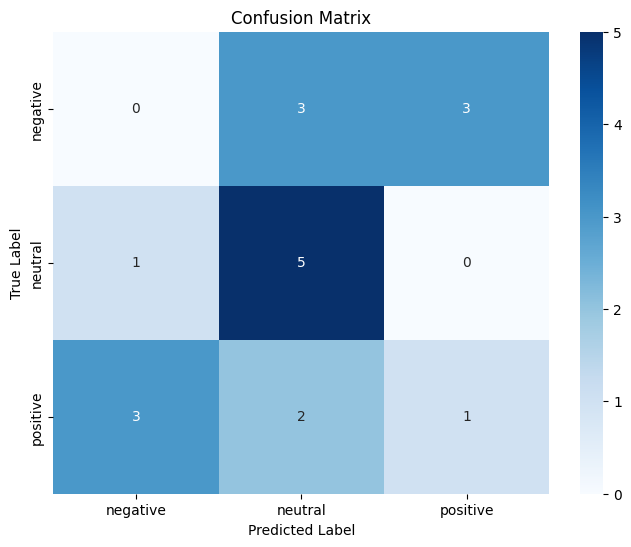

In [13]:
def create_complete_pipeline():
    """Create a complete classification pipeline."""
    
    # Create pipeline
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=1000, ngram_range=(1, 2))),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    # Train pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return pipeline, y_pred, accuracy, report, cm

# Create and evaluate pipeline
best_pipeline, predictions, accuracy, report, cm = create_complete_pipeline()

print(f"Pipeline Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Solution 5: Model Testing with New Examples

In [14]:
def test_with_new_examples(pipeline):
    """Test the trained model with new examples."""
    
    test_examples = [
        "Das Essen war wirklich lecker und der Service freundlich!",
        "Ich bin sehr enttäuscht von der schlechten Qualität.",
        "Das Produkt ist in Ordnung, nichts Besonderes.",
        "Absolut fantastisch, kann ich nur empfehlen!",
        "Furchtbar schlecht, das Geld nicht wert.",
        "Geht so, habe schon besseres gesehen."
    ]
    
    predictions = pipeline.predict(test_examples)
    
    # Get prediction probabilities
    try:
        probabilities = pipeline.predict_proba(test_examples)
        classes = pipeline.classes_
    except:
        probabilities = None
        classes = None
    
    print("Testing with New Examples:")
    print("=" * 60)
    
    for i, (text, pred) in enumerate(zip(test_examples, predictions)):
        print(f"\nExample {i+1}:")
        print(f"Text: {text}")
        print(f"Prediction: {pred}")
        
        if probabilities is not None:
            print("Confidence scores:")
            for class_name, prob in zip(classes, probabilities[i]):
                print(f"  {class_name}: {prob:.3f}")

# Test the model
test_with_new_examples(best_pipeline)

Testing with New Examples:

Example 1:
Text: Das Essen war wirklich lecker und der Service freundlich!
Prediction: negative
Confidence scores:
  negative: 0.412
  neutral: 0.265
  positive: 0.323

Example 2:
Text: Ich bin sehr enttäuscht von der schlechten Qualität.
Prediction: positive
Confidence scores:
  negative: 0.295
  neutral: 0.223
  positive: 0.482

Example 3:
Text: Das Produkt ist in Ordnung, nichts Besonderes.
Prediction: neutral
Confidence scores:
  negative: 0.303
  neutral: 0.422
  positive: 0.275

Example 4:
Text: Absolut fantastisch, kann ich nur empfehlen!
Prediction: positive
Confidence scores:
  negative: 0.255
  neutral: 0.222
  positive: 0.523

Example 5:
Text: Furchtbar schlecht, das Geld nicht wert.
Prediction: negative
Confidence scores:
  negative: 0.628
  neutral: 0.195
  positive: 0.177

Example 6:
Text: Geht so, habe schon besseres gesehen.
Prediction: neutral
Confidence scores:
  negative: 0.276
  neutral: 0.441
  positive: 0.283


## Solution 6: Feature Importance Analysis

In [15]:
def analyze_feature_importance(pipeline, top_n=10):
    """Analyze the most important features for each class."""
    
    try:
        # Get vectorizer and classifier
        vectorizer = pipeline.named_steps['vectorizer']
        classifier = pipeline.named_steps['classifier']
        
        # Get feature names
        feature_names = vectorizer.get_feature_names_out()
        
        # Get coefficients
        if hasattr(classifier, 'coef_'):
            coefficients = classifier.coef_
            classes = classifier.classes_
            
            print("Most Important Features by Class:")
            print("=" * 50)
            
            for i, class_name in enumerate(classes):
                print(f"\n{class_name.upper()} class:")
                
                # Get coefficients for this class
                coef = coefficients[i]
                
                # Get top positive coefficients
                top_indices = np.argsort(coef)[-top_n:]
                top_features = [(feature_names[idx], coef[idx]) for idx in reversed(top_indices)]
                
                print("Most indicative features:")
                for feature, score in top_features:
                    print(f"  {feature}: {score:.3f}")
        else:
            print("Feature importance not available for this classifier.")
    
    except Exception as e:
        print(f"Error analyzing features: {e}")

# Analyze feature importance
analyze_feature_importance(best_pipeline)

Most Important Features by Class:

NEGATIVE class:
Most indicative features:
  schlecht: 0.656
  abscheulich: 0.497
  furchtbar: 0.497
  minderwertig: 0.497
  mangelhaft: 0.497
  schrecklich: 0.497
  katastrophal: 0.497
  unerträglich: 0.497
  entsetzlich: 0.497
  nicht empfehlenswert: 0.302

NEUTRAL class:
Most indicative features:
  regulär: 0.483
  akzeptabel: 0.483
  durchschnittlich: 0.483
  mittelmäßig: 0.483
  standard: 0.483
  mäßig: 0.483
  alltäglich: 0.483
  erwartungsgemäß: 0.483
  annehmbar: 0.483
  passabel: 0.483

POSITIVE class:
Most indicative features:
  wundervoll: 0.489
  brilliant: 0.489
  hervorragend: 0.489
  toll: 0.489
  fantastisch: 0.489
  exzellent: 0.489
  beeindruckend: 0.489
  erstklassig: 0.489
  perfekt: 0.489
  gut: 0.452


## Solution 7: Performance Visualization

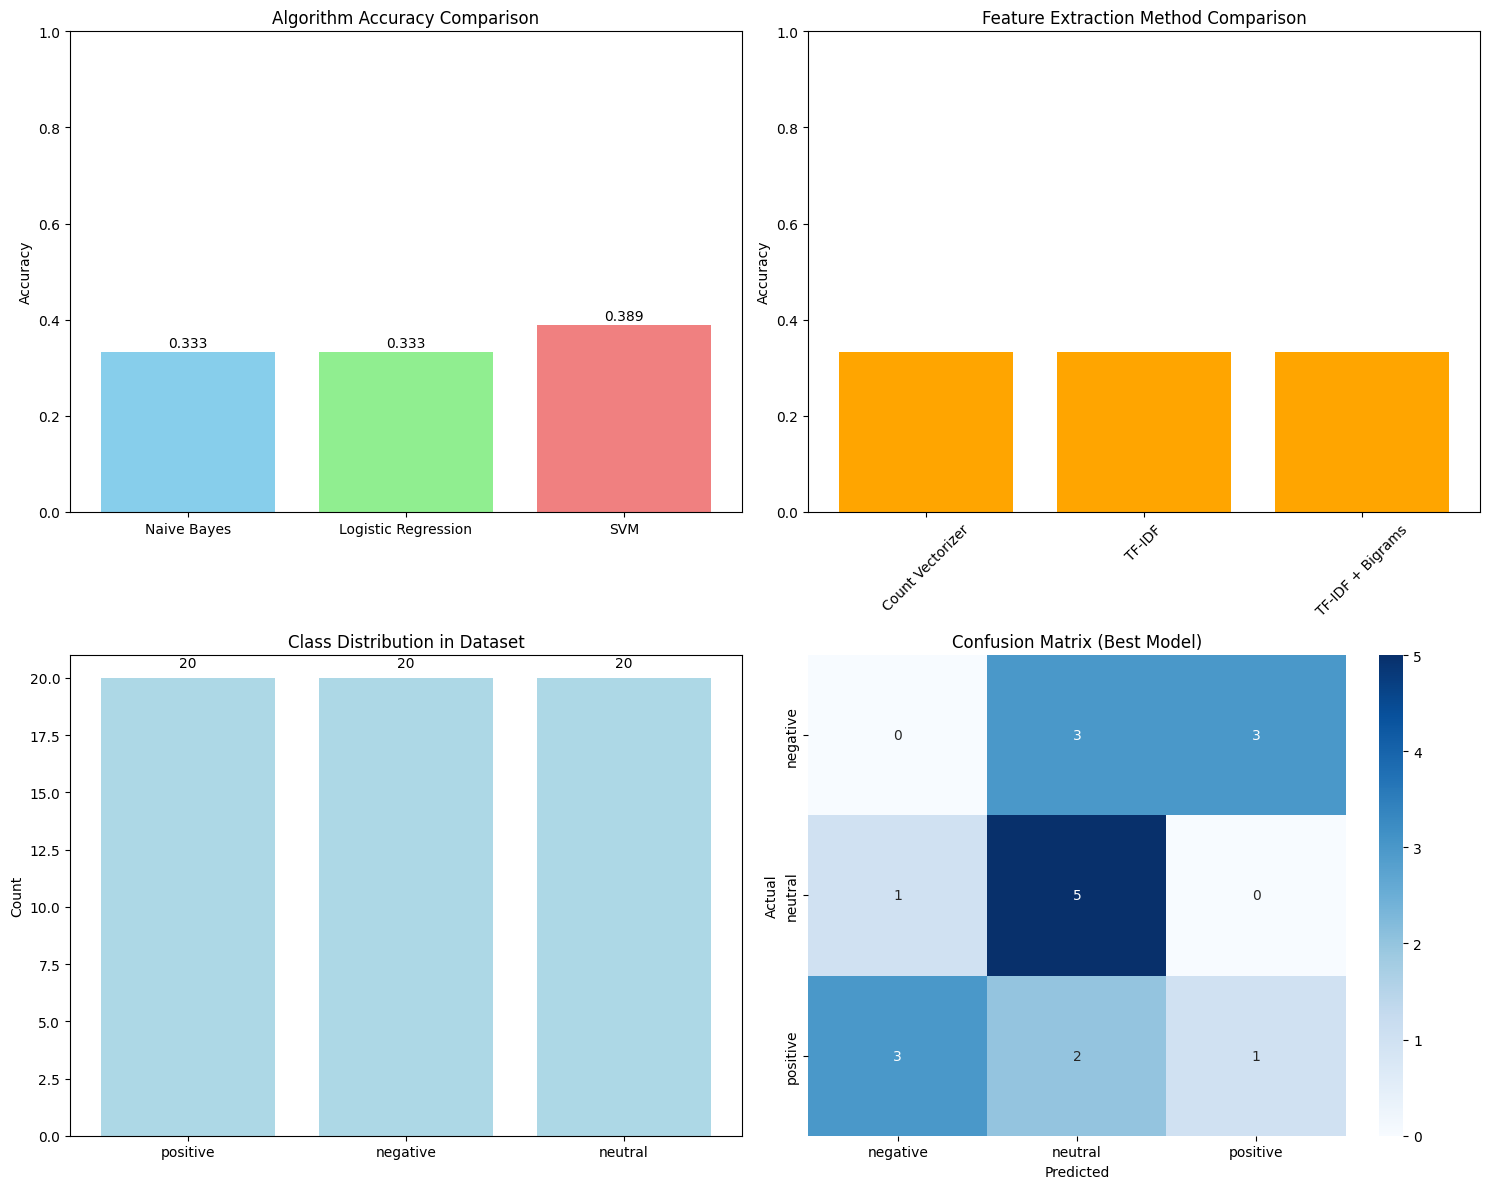

In [16]:
def create_performance_visualization():
    """Create comprehensive performance visualizations."""
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Algorithm comparison
    alg_names = list(algorithm_results.keys())
    accuracies = [algorithm_results[name]['accuracy'] for name in alg_names]
    
    axes[0, 0].bar(alg_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
    axes[0, 0].set_title('Algorithm Accuracy Comparison')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_ylim(0, 1)
    
    # Add value labels
    for i, v in enumerate(accuracies):
        axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    # 2. Feature extraction comparison
    feat_names = list(feature_results.keys())
    feat_accuracies = [feature_results[name]['accuracy'] for name in feat_names]
    
    axes[0, 1].bar(range(len(feat_names)), feat_accuracies, color='orange')
    axes[0, 1].set_title('Feature Extraction Method Comparison')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_xticks(range(len(feat_names)))
    axes[0, 1].set_xticklabels(feat_names, rotation=45)
    axes[0, 1].set_ylim(0, 1)
    
    # 3. Class distribution
    class_counts = df['label'].value_counts()
    axes[1, 0].bar(class_counts.index, class_counts.values, color='lightblue')
    axes[1, 0].set_title('Class Distribution in Dataset')
    axes[1, 0].set_ylabel('Count')
    
    # Add value labels on bars
    for i, v in enumerate(class_counts.values):
        axes[1, 0].text(i, v + 0.5, str(v), ha='center')
    
    # 4. Confusion matrix (already created above, create a simple version)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1],
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    axes[1, 1].set_title('Confusion Matrix (Best Model)')
    axes[1, 1].set_xlabel('Predicted')
    axes[1, 1].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

# Create visualization
create_performance_visualization()